In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Input, Concatenate, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from sklearn import model_selection
import re

In [2]:
train_data = pd.read_json('train_meta_data.json')
test_data = pd.read_json('test_meta_data.json')

X_train = train_data.drop(columns=['Title', 'Budget', 'Status', 'Released', 'Language', 'Director', 'Actors'])
y_train = train_data['Status']
X_test = test_data.drop(columns=['Title', 'Budget', 'Status', 'Released', 'Language', 'Director', 'Actors'])
y_test = test_data['Status']

def preprocess_text(sen):
    sentence = re.sub(r'[^\w]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

In [3]:
# token.fit_on_texts(X_train['Released'])
# max_length_released = max([len(s) for s in X_train['Released']])

# train_released_sequences = token.texts_to_sequences(X_train['Released'])
# train_released_padded = pad_sequences(train_released_sequences, maxlen=max_length_released)
# released_vocab_size = len(token.word_index)+1

# test_released_sequences = token.texts_to_sequences(X_test['Released'])
# test_released_padded = pad_sequences(test_released_sequences, maxlen=max_length_released)

# input_released = Input(shape=(max_length_released,))
# embedding_layer = Embedding(released_vocab_size, max_length_released)(input_released)
# LSTM_Layer_1 =LSTM(25, dropout=0.5)(embedding_layer)

In [172]:
# X_train_director = []
# data = list(X_train["Director"])

# for sen in data:
#     X_train_director.append(preprocess_text(sen))

# X_test_director = []
# data = list(X_test["Director"])

# for sen in data:
#     X_test_director.append(preprocess_text(sen))

# token.fit_on_texts(X_train_director)
# max_length_director = max([len(s) for s in X_train_director])

# train_director_sequences = token.texts_to_sequences(X_train_director)
# train_director_padded = pad_sequences(train_director_sequences, maxlen=max_length_director)
# director_vocab_size = len(token.word_index)+1

# test_director_sequences = token.texts_to_sequences(X_test_director)
# test_director_padded = pad_sequences(test_director_sequences, maxlen=max_length_director)

# input_director = Input(shape=(max_length_director,))
# embedding_layer = Embedding(director_vocab_size, max_length_director)(input_director)
# LSTM_Layer_2 =LSTM(32, dropout=0.5)(embedding_layer)
# dence_Layer_1 = Dense(8, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(LSTM_Layer_2)

In [173]:
# X_train_actors = []
# data = list(X_train["Actors"])

# for sen in data:
#     X_train_actors.append(preprocess_text(sen))

# X_test_actors = []
# data = list(X_test["Actors"])

# for sen in data:
#     X_test_actors.append(preprocess_text(sen))

# token.fit_on_texts(X_train_actors)
# max_length_actors = max([len(s) for s in X_train_actors])

# train_actors_sequences = token.texts_to_sequences(X_train_actors)
# train_actors_padded = pad_sequences(train_actors_sequences, maxlen=max_length_actors)
# actors_vocab_size = len(token.word_index)+1

# test_actors_sequences = token.texts_to_sequences(X_test_actors)
# test_actors_padded = pad_sequences(test_actors_sequences, maxlen=max_length_actors)

# input_actors = Input(shape=(max_length_actors,))
# embedding_layer = Embedding(actors_vocab_size, max_length_actors)(input_actors)
# LSTM_Layer_3 =LSTM(32, dropout=0.5)(embedding_layer)
# dence_Layer_2 = Dense(8, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(LSTM_Layer_3)

In [3]:
token = Tokenizer()
token.fit_on_texts(X_train['Awards'])
max_length_awards = max([len(s) for s in X_train['Awards']])

train_awards_sequences = token.texts_to_sequences(X_train['Awards'])
train_awards_padded = pad_sequences(train_awards_sequences, maxlen=max_length_awards)
awards_vocab_size = len(token.word_index)+1

test_awards_sequences = token.texts_to_sequences(X_test['Awards'])
test_awards_padded = pad_sequences(test_awards_sequences, maxlen=max_length_awards)

input_awards = Input(shape=(max_length_awards,))
embedding_layer = Embedding(awards_vocab_size, max_length_awards)(input_awards)
LSTM_Layer_1 = Bidirectional(LSTM(64, dropout=0.2))(embedding_layer)
dence_Layer_1 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01))(LSTM_Layer_1)

In [4]:
X_train_genre = []
data = list(X_train["Genre"])

for sen in data:
    X_train_genre.append(preprocess_text(sen))

X_test_genre = []
data = list(X_test["Genre"])

for sen in data:
    X_test_genre.append(preprocess_text(sen))

token.fit_on_texts(X_train_genre)
max_length_genre = max([len(s) for s in X_train_genre])
print(max_length_genre)

train_genre_sequences = token.texts_to_sequences(X_train_genre)
train_genre_padded = pad_sequences(train_genre_sequences, maxlen=max_length_genre)
genre_vocab_size = len(token.word_index)+1

test_genre_sequences = token.texts_to_sequences(X_test_genre)
test_genre_padded = pad_sequences(test_genre_sequences, maxlen=max_length_genre)

input_genre = Input(shape=(max_length_genre,))
embedding_layer = Embedding(genre_vocab_size, max_length_genre)(input_genre)
LSTM_Layer_2 = Bidirectional(LSTM(64, dropout=0.2))(embedding_layer)
dence_Layer_2 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(LSTM_Layer_2)

57


In [176]:
# X_train_language = []
# data = list(X_train["Language"])

# for sen in data:
#     X_train_language.append(preprocess_text(sen))
# # print(X_train_language)

# X_test_language = []
# data = list(X_test["Language"])

# for sen in data:
#     X_test_language.append(preprocess_text(sen))
# # print(X_test_director)

# token.fit_on_texts(X_train_language)
# max_length_language = max([len(s) for s in X_train_language])
# # print(max_length)

# train_language_sequences = token.texts_to_sequences(X_train_language)
# train_language_padded = pad_sequences(train_language_sequences, maxlen=max_length_language)
# language_vocab_size = len(token.word_index)+1

# test_language_sequences = token.texts_to_sequences(X_test_language)
# test_language_padded = pad_sequences(test_language_sequences, maxlen=max_length_language)

# input_language = Input(shape=(max_length_language,))
# embedding_layer = Embedding(language_vocab_size, max_length_language)(input_language)
# LSTM_Layer_6 =LSTM(10, dropout=0.5)(embedding_layer)
# input_language.dtype

In [44]:
X_train_rating = X_train['imdbRating']
# X_train_rating=X_train_rating.astype(str)
# token.fit_on_texts(X_train_rating)
# max_length_rating = max([len(s) for s in X_train_rating])
# print(max_length_rating)
# train_rating_sequences = token.texts_to_sequences(X_train_rating)
# train_rating_padded = pad_sequences(train_rating_sequences, maxlen=max_length_rating)

# rating_vocab_size = len(token.word_index)+1

X_test_rating = X_test['imdbRating']
# X_test_rating=X_test_rating.astype(str)
# test_rating_sequences = token.texts_to_sequences(X_test_rating)
# test_rating_padded = pad_sequences(test_rating_sequences, maxlen=max_length_rating)

input_rating = Input(shape=1)
dense_layer_3 = Dense(3, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(input_rating)
dense_layer_4 = Dense(200, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_3)
dense_layer_5 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-6))(dense_layer_4)

In [5]:
from tensorflow.python.keras.callbacks import EarlyStopping

# callback = EarlyStopping(monitor='val_loss')
concat_layer = Concatenate()([dence_Layer_1, dence_Layer_2])
dense_layer_6 = Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(concat_layer)
dense_layer_7 = Dense(32, activation='relu',kernel_regularizer=regularizers.l2(1e-6))(dense_layer_6)
output = Dense(1, activation='sigmoid')(dense_layer_7)
model = Model(inputs=[input_awards, input_genre], outputs=output)
model.summary()
# dot_img_file = 'model_1.png'
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 68)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 57)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 68, 68)       9520        input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 57, 57)       9234        input_2[0][0]                    
______________________________________________________________________________________________

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [7]:
history = model.fit([train_awards_padded, 
                     train_genre_padded], y_train, epochs=10, batch_size=20,
                     validation_data= ([test_awards_padded, 
                     test_genre_padded], y_test))

Epoch 1/10
22/22 [==============================] - 3s 146ms/step - loss: 1.6700 - accuracy: 0.7077 - val_loss: 1.4531 - val_accuracy: 0.6667
Epoch 2/10
22/22 [==============================] - 2s 74ms/step - loss: 1.2481 - accuracy: 0.7355 - val_loss: 1.1604 - val_accuracy: 0.6667
Epoch 3/10
22/22 [==============================] - 2s 74ms/step - loss: 0.9770 - accuracy: 0.7355 - val_loss: 0.9345 - val_accuracy: 0.6667
Epoch 4/10
22/22 [==============================] - 2s 75ms/step - loss: 0.7963 - accuracy: 0.7355 - val_loss: 0.7903 - val_accuracy: 0.6667
Epoch 5/10
22/22 [==============================] - 2s 75ms/step - loss: 0.6624 - accuracy: 0.7355 - val_loss: 0.7006 - val_accuracy: 0.6667
Epoch 6/10
22/22 [==============================] - 2s 73ms/step - loss: 0.5436 - accuracy: 0.7587 - val_loss: 0.6735 - val_accuracy: 0.7200
Epoch 7/10
22/22 [==============================] - 2s 74ms/step - loss: 0.4659 - accuracy: 0.8237 - val_loss: 0.7208 - val_accuracy: 0.7200
Epoch 8/10
2

In [8]:
score = model.evaluate(x=[test_awards_padded, 
                     test_genre_padded], y=y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1]*100)
# print("Score:", score[2])

3/3 [==============================] - 0s 10ms/step - loss: 0.9023 - accuracy: 0.7200
Test Score: 0.9023096561431885
Test Accuracy: 72.00000286102295


In [11]:
from sklearn.metrics import f1_score

x=[test_awards_padded, test_genre_padded]
y_pred = model.predict(x)

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_test, y_pred, sample_weight=None)
print('Accuracy %s' % m.result().numpy())

m = tf.keras.metrics.Precision()
m.update_state(y_test, y_pred, sample_weight=None)
print('Precission %s' % m.result().numpy())

m = tf.keras.metrics.Recall()
m.update_state(y_test, y_pred, sample_weight=None)
print('Recall %s' % m.result().numpy())

yhat_probs = model.predict(x, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs,axis=1)

f1 = f1_score(y_test, yhat_classes, average = 'weighted')
print('F1 score: %f' % f1)

Accuracy 0.72
Precission 0.6111111
Recall 0.44
F1 score: 0.533333


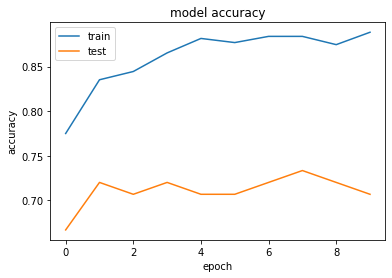

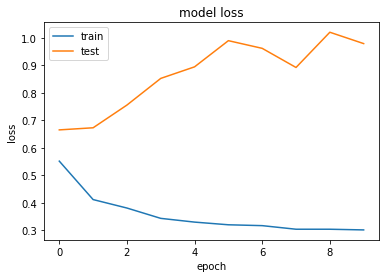

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [10]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

x=[test_awards_padded, test_genre_padded, test_rating_padded]
# predict probabilities for test set
yhat_probs = model.predict(x, verbose=0)
# predict crisp classes for test set
# np.argmax(yhat_classes,axis=1)
# yhat_classes = model.predict_classes(x, verbose=0)
# # reduce to 1d array
yhat_classes = np.argmax(yhat_probs,axis=1)

# yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)

NameError: name 'test_rating_padded' is not defined